# Sentiment Analysis of The Bible: A Comparative Study of Techniques

Here are the steps to complete the sentiment analysis project on the Bible:

Data Acquisition:

Obtain the full text of the Bible in a suitable format for processing.

Data Preparation:

Pre-process the Bible to remove irrelevant information, such as chapter and verse numbers.
Tokenize the text, separating it into individual words or phrases.
Remove stop words, which are common words with little analytical value.
Lemmatize the text, reducing words to their simplest form.
Implementation of Sentiment Analysis Techniques:

Implement lexicon-based methods: VADER, TextBlob, and SentiWordNet.
Implement machine learning-based methods: Naive Bayes, Support Vector Machines (SVM), and Random Forest.
Implement deep learning-based methods: Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM), and Bidirectional Encoder Representations from Transformers (BERT).
Model Training and Evaluation:

Train each sentiment analysis technique on a suitable dataset (if applicable).
Apply each technique to the pre-processed Bible text.
Evaluate the performance of each technique using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and AUC-ROC.
Comparative Analysis:

Compare the results of different sentiment analysis techniques.
Identify the most effective approach for sentiment analysis of religious texts.
Interpretation of Results:

Analyze the sentiment trends across different books or sections of the Bible.
Identify the key insights gained from the sentiment analysis.
Dissemination of Results:

Write a research paper detailing the findings, methodology, and implications.
Submit the paper to relevant conferences or journals.
Create an online repository (e.g., GitHub) to share code, data, and findings with the research community.
Future Work and Extensions:

Apply the most effective sentiment analysis technique to other religious texts.
Investigate the impact of translation and cultural context on sentiment analysis results.
Develop an interactive tool or web application for visualizing the sentiment of specific verses or passages in religious texts.

In [56]:
%pip install nltk
%pip install seaborn
%pip install sympy
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
# Import the required libraries for text preprocessing and analysis.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

# Install NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Preparation

We are going to load the information from the csv file and then we are going to clean the data by:
<p> remove the stopwords
<p> lemmatize the words

In [59]:
'''
The code in this module loads the text of the Bible from a CSV file, 
creates a DataFrame with the verses of the Bible, and applies a text preprocessing function to the DataFrame. 
The preprocessing function tokenizes the text, removes stopwords, and lemmatizes the remaining words.

This module requires the following libraries to be installed: pandas, NLTK, and WordNetLemmatizer. 
The NLTK library must also have the stopwords corpus downloaded.
'''

# Load the Bible text from the CSV file
bible_data = pd.read_csv("t_kjv.csv")
bible_text = ' '.join(bible_data.iloc[:, 4].tolist())

# create a df with one column named 'verse-text' and the verses as the values
bible_df = pd.DataFrame(bible_data.iloc[:, 4].tolist(), columns=['verse-text'])

# Print the first 10 rows of the dataframe
print(bible_df.head(10))

# Preprocessing function
def preprocess_text(text: str) -> str:
    """
    Preprocess the text by tokenizing, removing stopwords, and lemmatizing.

    Parameters:
    text (str): The text to be preprocessed.

    Returns:
    str: The preprocessed text.
    """
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return ' '.join(lemmatized_tokens)

# Apply the preprocessing function to the dataframe
bible_df['processed-text'] = bible_df['verse-text'].apply(preprocess_text)

# Print the first 10 rows of the dataframe
print(bible_df.head(10))

                                          verse-text
0  In the beginning God created the heaven and th...
1  And the earth was without form, and void; and ...
2  And God said, Let there be light: and there wa...
3  And God saw the light, that it was good: and G...
4  And God called the light Day, and the darkness...
5  And God said, Let there be a firmament in the ...
6  And God made the firmament, and divided the wa...
7  And God called the firmament Heaven. And the e...
8  And God said, Let the waters under the heaven ...
9  And God called the dry land Earth; and the gat...
                                          verse-text   
0  In the beginning God created the heaven and th...  \
1  And the earth was without form, and void; and ...   
2  And God said, Let there be light: and there wa...   
3  And God saw the light, that it was good: and G...   
4  And God called the light Day, and the darkness...   
5  And God said, Let there be a firmament in the ...   
6  And God made the firma

# Labeling the dataset
We are going to take 3 separate approaches to labeling the dataset. 

Label the dataset using VADER

Label the dataset using TextBlob

Label the dataset using SentiWordNet

From here we will compare the results of each approach and see which one is the most accurate. This will allow us to determine which approach yeilds the best results for our sentiment analysis. We will then use the best approach to label the dataset and use it to train our and test our Machine Learning models, and our Deep Learning models.

# VaderSentiment

What is VaderSentiment? and How does it work?

VaderSentiment is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is available for Python and R, and is the most widely used sentiment analysis tool. It is also the fastest of the sentiment analysis tools we will be using.

In [ ]:
%pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 126.0/126.0 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 62.5/62.5 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 123.2/123.2 kB ? eta 0:00:00
     -------------------------------------- 157.0/157.0 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 97.1/97.1 kB ? eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_label(sentence: str) -> str:
    '''
    Computes the sentiment label of a given sentence using VADER (Valence Aware Dictionary and Sentiment Reasoner).

    PARAMETERS:
    sentence (str): The sentence to be classified.

    RETURNS:
    str: The sentiment label of the input sentence. It can be one of "positive", "negative" or "neutral".

    EXAMPLE:
    >>> vader_label("I love this movie!")
    'positive'
    '''
    polarity = analyzer.polarity_scores(sentence)["compound"]
    if polarity > 0:
        return ("positive", polarity)
    elif polarity < 0:
        return ("negative", polarity)
    else:
        return ("neutral", polarity)

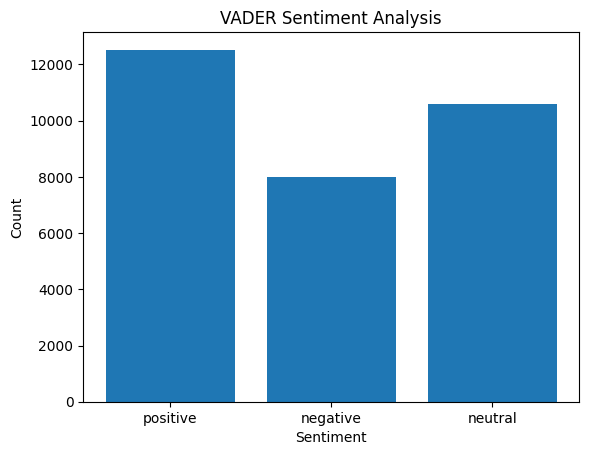

In [ ]:
# for each sentence in the bible_df, apply the vader_label function
bible_df['vader_sentiment_label'] = bible_df['processed-text'].apply(vader_label)

# print the first 10 rows of the dataframe
bible_df['vader_sentiment_label'].head(10)

# count the amount of positive, negative and neutral sentences, assign the result to the variables below
positive = 0
negative = 0
neutral = 0

for label in bible_df['vader_sentiment_label']:
    if label[0] == 'positive':
        positive += 1
    elif label[0] == 'negative':
        negative += 1
    else:
        neutral += 1

vader_labels = ['positive', 'negative', 'neutral']
vader_counts = [positive, negative, neutral]

# put the labels and counts in a dictionary
vader_dict = dict(zip(vader_labels, vader_counts))

# plot the results
import matplotlib.pyplot as plt

plt.bar(vader_labels, vader_counts)
plt.title('VADER Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# TextBlob

What is TextBlob? and How does it work?

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [ ]:
%pip install textblob

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ------------------------------------- 636.8/636.8 kB 20.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from textblob import TextBlob

def textblob_label(sentence: str) -> tuple[str, float]:
    '''
        Determine the sentiment label of a given sentence using the TextBlob package.

    PARAMETERS:
    sentence (str): The input sentence to be classified.

    RETURNS:
    str: The sentiment label of the input sentence, which can be 'positive', 'negative', or 'neutral'.

    EXAMPLE:
    >>> textblob_label("This is a positive sentence.")
    'positive'
    '''
    polarity = TextBlob(sentence).sentiment.polarity
    if polarity > 0:
        return ("positive", polarity)
    elif polarity < 0:
        return ("negative", polarity)
    else:
        return ("neutral", polarity)

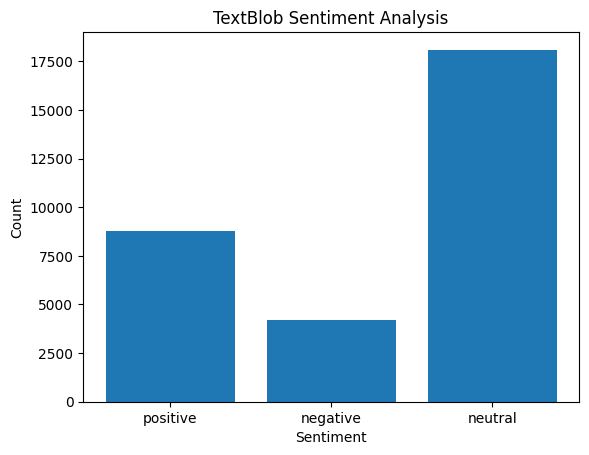

In [ ]:
# for each sentence in the bible_df, apply the textblob_label function, store both the sentiment label and the polarity
bible_df['textblob_sentiment_label'] = bible_df['processed-text'].apply(textblob_label)

# print the first 10 rows of the dataframe
bible_df['textblob_sentiment_label'].head(10)

# count the amount of positive, negative and neutral sentences, assign the result to the variables below
positive = 0
negative = 0
neutral = 0

for label in bible_df['textblob_sentiment_label']:
    if label[0] == 'positive':
        positive += 1
    elif label[0] == 'negative':
        negative += 1
    else:
        neutral += 1

textblob_labels = ['positive', 'negative', 'neutral']
textblob_counts = [positive, negative, neutral]

# put the labels and counts in a dictionary
textblob_dict = dict(zip(textblob_labels, textblob_counts))

# plot the results
import matplotlib.pyplot as plt

plt.bar(textblob_labels, textblob_counts)
plt.title('TextBlob Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# SentiWordNet

What is SentiWordNet? and How does it work?

SentiWordNet is a lexical resource for opinion mining. SentiWordNet assigns to each synset of WordNet three sentiment scores: positivity, negativity, objectivity. SentiWordNet is publicly available for download and can be integrated into computational systems.

In [ ]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("sentiwordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

lemmatizer = WordNetLemmatizer()

def sentiwordnet_label(sentence: str) -> tuple[str, float]:
    '''
    PARAMETERS:
    sentence (str): The sentence to be classified.

    RETURNS:
    str: The sentiment label for the given sentence.

    EXAMPLES:
    >>> sentiwordnet_label("I love spending time with my family.")
    'positive'
    >>> sentiwordnet_label("This food is terrible.")
    'negative'
    >>> sentiwordnet_label("The weather today is neither good nor bad.")
    'neutral'
    '''
    tokens = word_tokenize(sentence)
    tagged_tokens = nltk.pos_tag(tokens)
    pos_score = 0
    neg_score = 0

    for token, tag in tagged_tokens:
        wn_tag = nltk2wn_tag(tag)
        if not wn_tag:
            continue
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        synsets = list(swn.senti_synsets(lemma, pos=wn_tag))

        if not synsets:
            continue

        synset = synsets[0]
        pos_score += synset.pos_score()
        neg_score += synset.neg_score()

    if pos_score > neg_score:
        return ("positive", pos_score)
    elif pos_score < neg_score:
        return ("negative", neg_score)
    else:
        return ("neutral", 0)

def nltk2wn_tag(nltk_tag: str) -> str:
    """
    Maps part-of-speech tags from the NLTK pos_tag function to WordNet part-of-speech tags.

    PARAMETERS:
    nltk_tag (str): A part-of-speech tag generated by the NLTK pos_tag function.

    RETURNS:
    str: A WordNet part-of-speech tag corresponding to the input NLTK tag.

    EXAMPLES:
    >>> nltk2wn_tag("NN")
    "n"
    >>> nltk2wn_tag("JJ")
    "a"
    >>> nltk2wn_tag("VB")
    "v"
    >>> nltk2wn_tag("RB")
    "r"
    >>> nltk2wn_tag("DT")
    None
    """
    if nltk_tag.startswith("J"):
        return "a"
    elif nltk_tag.startswith("N"):
        return "n"
    elif nltk_tag.startswith("R"):
        return "r"
    elif nltk_tag.startswith("V"):
        return "v"
    else:
        return None

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


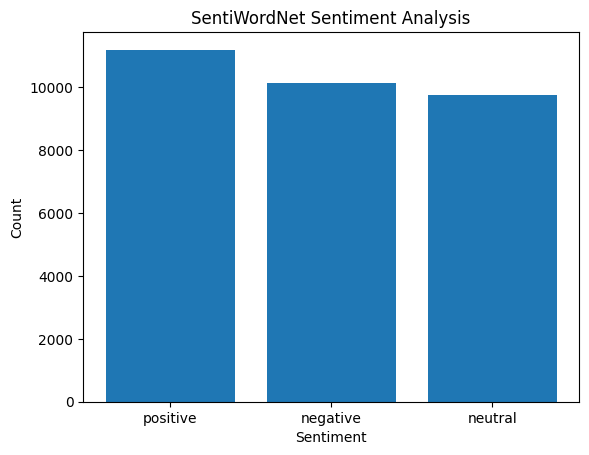

In [ ]:
# for each sentence in the bible_df, apply the sentiwordnet_label
bible_df['sentiwordnet_sentiment_label'] = bible_df['processed-text'].apply(sentiwordnet_label)

# print the first 10 rows of the dataframe
bible_df['sentiwordnet_sentiment_label'].head(10)

# count the amount of positive, negative and neutral sentences, assign the result to the variables below
positive = 0
negative = 0
neutral = 0

for label in bible_df['sentiwordnet_sentiment_label']:
    if label[0] == 'positive':
        positive += 1
    elif label[0] == 'negative':
        negative += 1
    else:
        neutral += 1

sentiwordnet_labels = ['positive', 'negative', 'neutral']
sentiwordnet_counts = [positive, negative, neutral]

# put the labels and counts in a dictionary
sentiwordnet_dict = dict(zip(sentiwordnet_labels, sentiwordnet_counts))

# plot the results
import matplotlib.pyplot as plt

plt.bar(sentiwordnet_labels, sentiwordnet_counts)
plt.title('SentiWordNet Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Comparing the results of each approach

We will compare the results of each approach and see which one is the most accurate. This will allow us to determine which approach yeilds the best results for our sentiment analysis. We will then use the best approach to label the dataset and use it to train our and test our Machine Learning models, and our Deep Learning models.

In order to complete this we will first need to recreate the results from the following kaggle project:
https://www.kaggle.com/code/gpreda/explore-king-james-bible-books/report#sentiment-analysis

We will achieve this by using the python port of the package used in the kaggle project. The package is called "sentimentr" and can be found here:
https://pypi.org/project/sentimentr/

In [ ]:
! pip install sentimentr

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 72.6/72.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for sentimentr, since package 'wheel' is not installed.
  Running setup.py install for sentimentr: started
  Running setup.py install for sentimentr: finished with status 'done'



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sentimentr.sentimentr import Sentiment

def sentimentr_label(sentence: str) -> tuple[str, float]:
    '''
    Determine the sentiment label of a given sentence using the sentimentr package.

    PARAMETERS:
    sentence (str): The input sentence to be classified.

    RETURNS:
    str: The sentiment label of the input sentence, which can be 'positive', 'negative', or 'neutral'.

    EXAMPLE:
    >>> sentimentr_label("This is a positive sentence.")
    'positive'
    '''
    polarity = Sentiment.get_polarity_score(sentence)
    if polarity > 0:
        return ("positive", polarity)
    elif polarity < 0:
        return ("negative", polarity)
    else:
        return ("neutral", polarity)

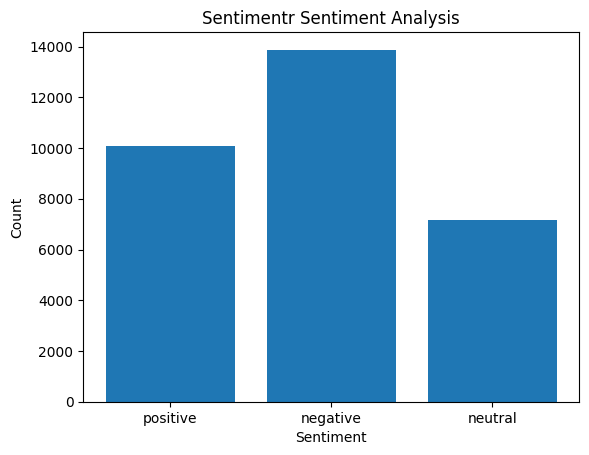

In [ ]:
# for each sentence in the bible_df, apply the sentimentr_label function
bible_df['sentimentr_sentiment_label'] = bible_df['processed-text'].apply(sentimentr_label)

# print the first 10 rows of the dataframe
bible_df['sentimentr_sentiment_label'].head(10)

# count the amount of positive, negative and neutral sentences, assign the result to the variables below
positive = 0
negative = 0
neutral = 0

for label in bible_df['sentimentr_sentiment_label']:
    if label[0] == 'positive':
        positive += 1
    elif label[0] == 'negative':
        negative += 1
    else:
        neutral += 1

sentimentr_labels = ['positive', 'negative', 'neutral']
sentimentr_counts = [positive, negative, neutral]

# put the labels and counts in a dictionary
sentimentr_dict = dict(zip(sentimentr_labels, sentimentr_counts))

# plot the results
import matplotlib.pyplot as plt

plt.bar(sentimentr_labels, sentimentr_counts)
plt.title('Sentimentr Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

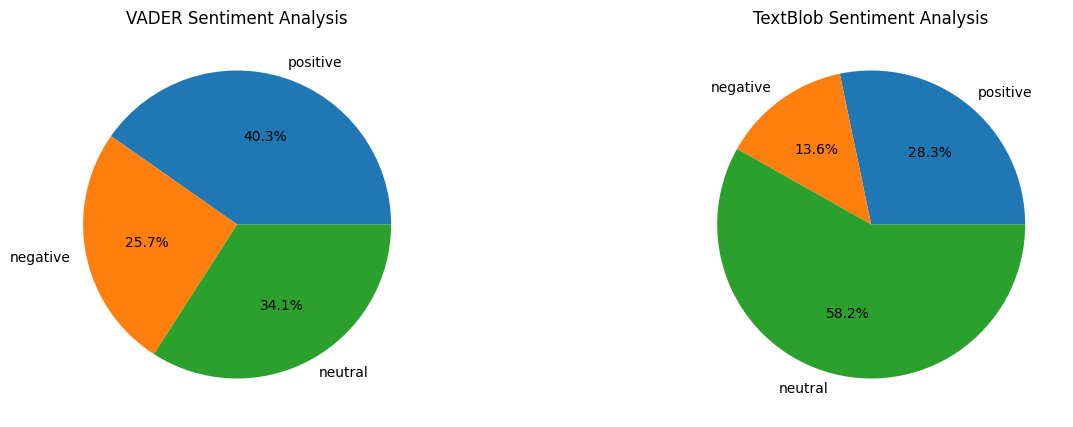

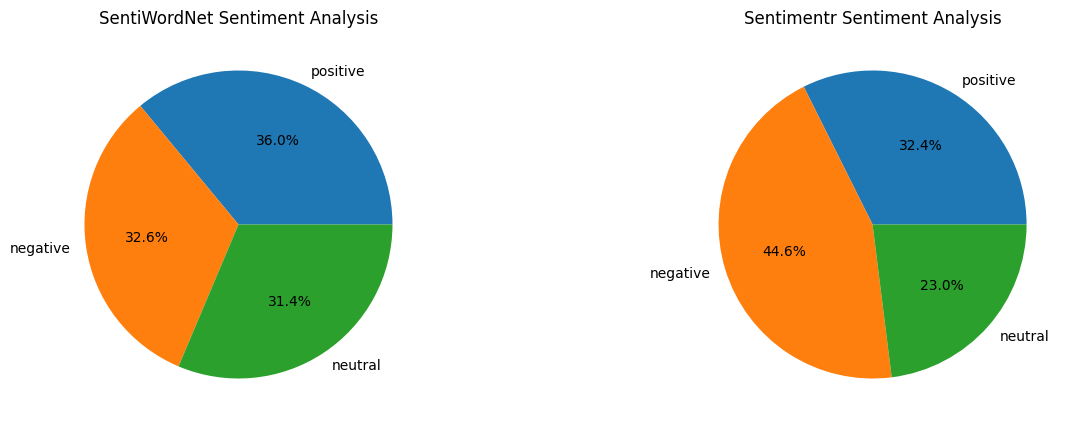

In [ ]:
import numpy as np

# create pie charts for each sentiment analysis method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

ax1.pie(list(vader_dict.values()), labels=list(vader_dict.keys()), autopct='%1.1f%%')
ax1.set_title('VADER Sentiment Analysis')

ax2.pie(list(textblob_dict.values()), labels=list(textblob_dict.keys()), autopct='%1.1f%%')
ax2.set_title('TextBlob Sentiment Analysis')

ax3.pie(list(sentiwordnet_dict.values()), labels=list(sentiwordnet_dict.keys()), autopct='%1.1f%%')
ax3.set_title('SentiWordNet Sentiment Analysis')

ax4.pie(list(sentimentr_dict.values()), labels=list(sentimentr_dict.keys()), autopct='%1.1f%%')
ax4.set_title('Sentimentr Sentiment Analysis')

plt.show()

# Ensemble Method of Voting

We will use the ensemble method of voting to combine the results of the 3 approaches to labeling the dataset. We will then use the results of the ensemble method to train and test our Machine Learning models, and our Deep Learning models.

In [ ]:
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet as wn

def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

def sentimentr_sentiment(text):
    sentiment = Sentiment.get_polarity_score(text)
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

def sentiwordnet_sentiment(text):
    tagged_text = pos_tag(word_tokenize(text))

    pos_score = neg_score = 0
    for word, tag in tagged_text:
        wn_tag = None
        if tag.startswith('N'):
            wn_tag = wn.NOUN
        elif tag.startswith('V'):
            wn_tag = wn.VERB
        elif tag.startswith('R'):
            wn_tag = wn.ADV
        elif tag.startswith('J'):
            wn_tag = wn.ADJ

        if wn_tag is not None:
            if synsets := wn.synsets(word, pos=wn_tag):
                swn_synset = swn.senti_synset(synsets[0].name())
                pos_score += swn_synset.pos_score()
                neg_score += swn_synset.neg_score()

    if pos_score > neg_score:
        return 'positive'
    elif pos_score < neg_score:
        return 'negative'
    else:
        return 'neutral'

def ensemble_sentiment(text):
    vader = vader_sentiment(text)
    sentimentr = sentimentr_sentiment(text)
    sentiwordnet = sentiwordnet_sentiment(text)

    sentiment_votes = {'positive': 0, 'negative': 0, 'neutral': 0}
    sentiment_votes[vader] += 1
    sentiment_votes[sentimentr] += 1
    sentiment_votes[sentiwordnet] += 1

    return max(sentiment_votes, key=sentiment_votes.get)

In [ ]:
# for each sentence in the bible_df, apply the ensemble_sentiment function

import seaborn as sns
bible_df['ensemble_sentiment_label'] = bible_df['processed-text'].apply(ensemble_sentiment)

<Axes: xlabel='ensemble_sentiment_label', ylabel='count'>

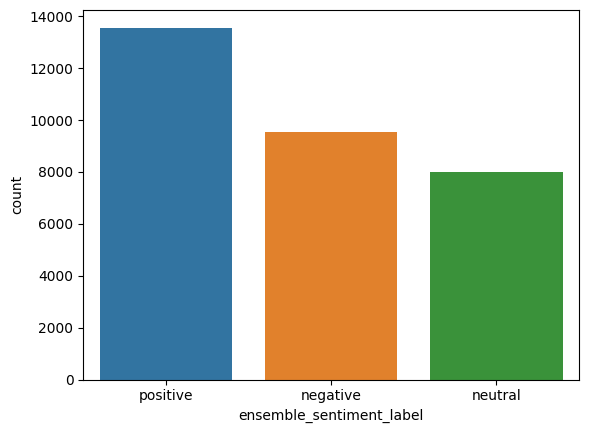

In [ ]:
# plot the distribution of the sentiment labels
sns.countplot(x='ensemble_sentiment_label', data=bible_df)

In [ ]:
bible_df_labelled = bible_df.drop(columns=['verse-text', 'vader_sentiment_label', 'textblob_sentiment_label', 'sentiwordnet_sentiment_label', 'sentimentr_sentiment_label', ])
print(bible_df_labelled.columns)
print(bible_df_labelled.head(10))

Index(['processed-text', 'ensemble_sentiment_label'], dtype='object')
                                      processed-text ensemble_sentiment_label
0                 beginning god created heaven earth                 positive
1  earth without form void darkness upon face dee...                 positive
2                           god said let light light                 positive
3      god saw light good god divided light darkness                 negative
4  god called light day darkness called night eve...                 negative
5  god said let firmament midst water let divide ...                  neutral
6  god made firmament divided water firmament wat...                 positive
7  god called firmament heaven evening morning se...                 positive
8  god said let water heaven gathered together un...                 positive
9  god called dry land earth gathering together w...                 positive


In [ ]:
%pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 8.3/8.3 MB 44.1 MB/s eta 0:00:00
     --------------------------------------- 42.5/42.5 MB 50.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# assign preprocessed text to a variable
preprocessed_text = bible_df['processed-text']

#  assign ground truth labels to a variable
ground_truth_labels = bible_df['ensemble_sentiment_label']

# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_text) 
y = ground_truth_labels

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))

Naive Bayes accuracy: 0.684455875261212
SVM accuracy: 0.7833145796495741
Random Forest accuracy: 0.7445748271981997


In [ ]:
# Compare the accuracy of each model
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))

print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))

print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))

Naive Bayes accuracy: 0.684455875261212
SVM accuracy: 0.7833145796495741
Random Forest accuracy: 0.7482719819964636


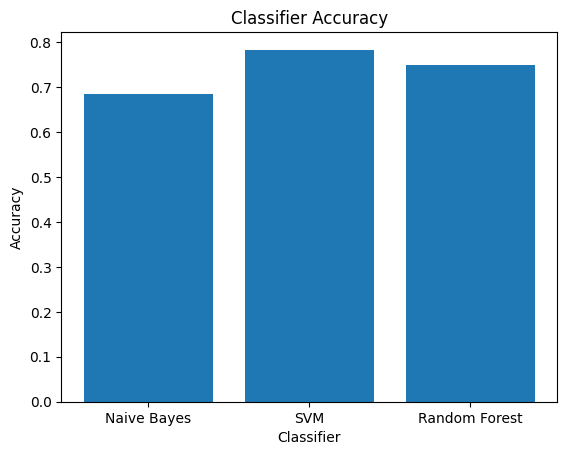

In [ ]:
# plot the  results of the three models in a bar chart
import matplotlib.pyplot as plt

# create a bar chart of the results
plt.bar(['Naive Bayes', 'SVM', 'Random Forest'], [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)])

# add a title and axis labels
plt.title('Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# display the bar chart
plt.show()

# Misclassification Analysis

We will use the misclassification analysis to determine which words are being misclassified by our model SVM model.

In [ ]:
%pip install wordcloud

In [ ]:
# get a list of misclassified verses from the SVM classifier
verses = bible_df['processed-text'].tolist()
ground_truth_labels = bible_df['ensemble_sentiment_label'].tolist() 

# get the predictions from the SVM classifier
SVM_Labels = svm_classifier.predict(X)

misclassified_verses = []
misclassified_labels = []
misclassified_ground_truth_labels = []

for i in range(len(verses)):
    if ground_truth_labels[i] != SVM_Labels[i]:
        misclassified_verses.append(verses[i])
        misclassified_labels.append(SVM_Labels[i])
        misclassified_ground_truth_labels.append(ground_truth_labels[i])

# how many verses were misclassified?
print("Total number of verses:", len(verses))
print("Number of misclassified verses:", len(misclassified_verses))

# show the total amount of each misclassified label
print("Positive misclassifications:", misclassified_labels.count('positive'))
print("Negative misclassifications:", misclassified_labels.count('negative'))
print("Neutral misclassifications:", misclassified_labels.count('neutral'))

Total number of verses: 31103
Number of misclassified verses: 2020
Positive misclassifications: 1005
Negative misclassifications: 404
Neutral misclassifications: 611


In [ ]:
#print the top 10 postive misclassifications

positive_misclassifications = []
positive_misclassifications_labels = []
positive_misclassifications_ground_truth_labels = []

negative_misclassifications = []
negative_misclassifications_labels = []
negative_misclassifications_ground_truth_labels = []

neutral_misclassifications = []
neutral_misclassifications_labels = []
neutral_misclassifications_ground_truth_labels = []

for i in range(len(misclassified_verses)):
    if misclassified_labels[i] == 'positive':
        positive_misclassifications.append(i)
        positive_misclassifications_labels.append(misclassified_labels[i])
        positive_misclassifications_ground_truth_labels.append(ground_truth_labels[i])
    elif misclassified_labels[i] == 'negative':
        negative_misclassifications.append(i)
        negative_misclassifications_labels.append(misclassified_labels[i])
        negative_misclassifications_ground_truth_labels.append(ground_truth_labels[i])
    else:
        neutral_misclassifications.append(i)
        neutral_misclassifications_labels.append(misclassified_labels[i])
        neutral_misclassifications_ground_truth_labels.append(ground_truth_labels[i])

print("Top 5 positive misclassifications:")
for i in range(5):
    print(f"Verse: {misclassified_verses[positive_misclassifications[i]]}")
    print(f"Predicted label: {positive_misclassifications_labels[i]}")
    print(f"Ground truth label: {positive_misclassifications_ground_truth_labels[i]}")
    print()

print("Top 5 negative misclassifications:")
for i in range(5):
    print(f"Verse: {misclassified_verses[negative_misclassifications[i]]}")
    print(f"Predicted label: {negative_misclassifications_labels[i]}")
    print(f"Ground truth label: {negative_misclassifications_ground_truth_labels[i]}")
    print()

print("Top 5 neutral misclassifications:")
for i in range(5):
    print(f"Verse: {misclassified_verses[neutral_misclassifications[i]]}")
    print(f"Predicted label: {neutral_misclassifications_labels[i]}")
    print(f"Ground truth label: {neutral_misclassifications_ground_truth_labels[i]}")
    print()

Top 5 positive misclassifications:
Verse: god called light day darkness called night evening morning first day
Predicted label: positive
Ground truth label: positive

Verse: god created man image image god created male female created
Predicted label: positive
Ground truth label: positive

Verse: god said behold given every herb bearing seed upon face earth every tree fruit tree yielding seed shall meat
Predicted label: positive
Ground truth label: negative

Verse: name second river gihon compasseth whole land ethiopia
Predicted label: positive
Ground truth label: negative

Verse: serpent subtil beast field lord god made said unto woman yea hath god said ye shall eat every tree garden
Predicted label: positive
Ground truth label: neutral

Top 5 negative misclassifications:
Verse: establish covenant neither shall flesh cut water flood neither shall flood destroy earth
Predicted label: negative
Ground truth label: positive

Verse: said behold lord turn pray servant house tarry night wash 

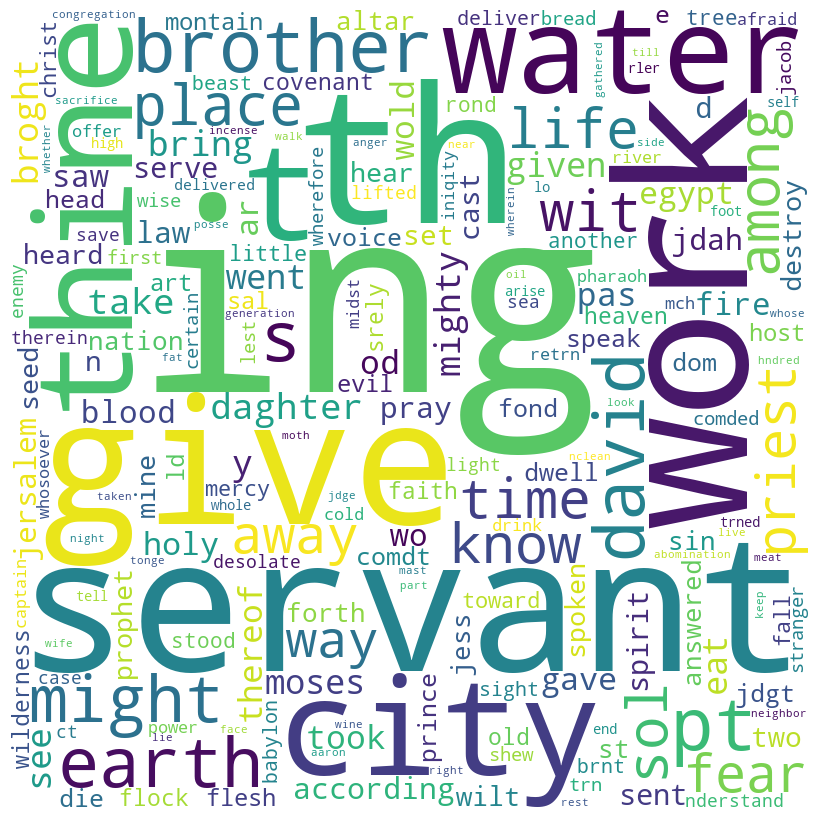

In [ ]:
from sympy.abc import x
from wordcloud import WordCloud

misclassified_verses_no_neutral = []
misclassified_labels_no_neutral = []

for i in range(len(misclassified_verses)):
    if misclassified_labels[i] != 'neutral':
        misclassified_verses_no_neutral.append(misclassified_verses[i])
        misclassified_labels_no_neutral.append(misclassified_labels[i])

# get the words with highest frequency in the misclassified_labels_no_neutral list
word_freq = {}
for verse in misclassified_verses_no_neutral:
    for word in verse.split():
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# sort the words with highest frequency in the misclassified_labels_no_neutral list0
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# remove the top 100 most frequent words from the misclassified_verses_no_neutral list
for i in range(len(misclassified_verses_no_neutral)):
    for word in sorted_words[:50]:
        if word[0] in misclassified_verses_no_neutral[i]:
            misclassified_verses_no_neutral[i] = misclassified_verses_no_neutral[i].replace(word[0], '')

# plot the misclassified verses in a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(misclassified_verses_no_neutral))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Test #1:
We will test our model on generated text to see how it performs on text generated from it's corpus. The text will be randomly selected based on sentiment. The text will be generated with out consideration for grammatical correctness and coherency.

In [62]:
import random

words = bible_df['processed-text'].str.cat(sep=' ').split()  # extract words from the bible_df
vocab = pd.DataFrame(words, columns=['text'])

# only keep the unique words
vocab = vocab.drop_duplicates()
print(f'There are {len(vocab)} unique words in the Bible.')

# call the ensemble_sentiment function on each word in the vocab
vocab['sentiment'] = vocab['text'].apply(ensemble_sentiment)

print(f'Sentiments assigned to each word in the vocab: {vocab.head(10)}')

There are 11276 unique words in the Bible.
Sentiments assigned to each word in the vocab:          text sentiment
0   beginning   neutral
1         god   neutral
2     created   neutral
3      heaven  positive
4       earth   neutral
6     without   neutral
7        form   neutral
8        void   neutral
9    darkness  negative
10       upon   neutral


In [63]:
positive_vocab = []
negative_vocab = []
neutral_vocab = []

for index, row in vocab.iterrows():
    word = row['text']
    sentiment = row['sentiment']
    if sentiment == 'positive':
        positive_vocab.append(word)
    elif sentiment == 'negative':
        negative_vocab.append(word)
    else:
        neutral_vocab.append(word)

def generate_sentence(sentiment: str) -> str:
    if sentiment == 'negative':
        words = negative_vocab
    elif sentiment == 'positive':
        words = positive_vocab
    else:
        words = neutral_vocab

    # generate a random sentence
    length = random.randint(4, 10)
    sentence = ''
    for _ in range(length):
        index = random.randint(0, len(words) - 1)
        word = words[index]
        sentence += f' {word}'

    return sentence

# generate 20 positive sentences and 20 negative sentences and neutral sentences
random_sentences = []

for i in range(20):
    random_sentences.append(generate_sentence('positive'))
    random_sentences.append(generate_sentence('negative'))
    random_sentences.append(generate_sentence('neutral'))
print(random_sentences)

[' wealth fugitive rescue fiery astonished honor accept deepness plenty', ' deceit burn dread steal waste woe dimness condemnation', ' banded almondiblathaim malchus cleanseth', ' confident superstitious swift blessed greatness', ' deceit offense trouble demanded punish sorry troubled deceived piss', ' beeliada soldier purged arioch', ' amiable determination health tenderhearted comforted greeting freed grudgingly prize', ' ban choked blot weep dark lowliness provoked calamity cried woe', ' lean addan stoning pick simri darkish sukkiims mecherathite wide speakest', ' purity prosperous preferring richly guiltless wished fiery disease thankful', ' oppressed severity pernicious temper faintness devilish bribe', ' compassed dimonah mizraim jehoahaz vajezatha matri mesopotamia necromancer approvest gur', ' entertained delectable attentive honesty unjustly', ' vexation sick pity corrupting unaccustomed', ' wrestle disquietness sometimes transgressest mijamin saint', ' dear joyous beautiful v

verse:  wealth fugitive rescue fiery astonished honor accept deepness plenty, SVM prediction: positive, ground truth label: positive
verse:  deceit burn dread steal waste woe dimness condemnation, SVM prediction: negative, ground truth label: negative
verse:  banded almondiblathaim malchus cleanseth, SVM prediction: neutral, ground truth label: neutral
verse:  confident superstitious swift blessed greatness, SVM prediction: positive, ground truth label: positive
verse:  deceit offense trouble demanded punish sorry troubled deceived piss, SVM prediction: negative, ground truth label: negative
verse:  beeliada soldier purged arioch, SVM prediction: neutral, ground truth label: neutral
verse:  amiable determination health tenderhearted comforted greeting freed grudgingly prize, SVM prediction: positive, ground truth label: positive
verse:  ban choked blot weep dark lowliness provoked calamity cried woe, SVM prediction: negative, ground truth label: negative
verse:  lean addan stoning pick

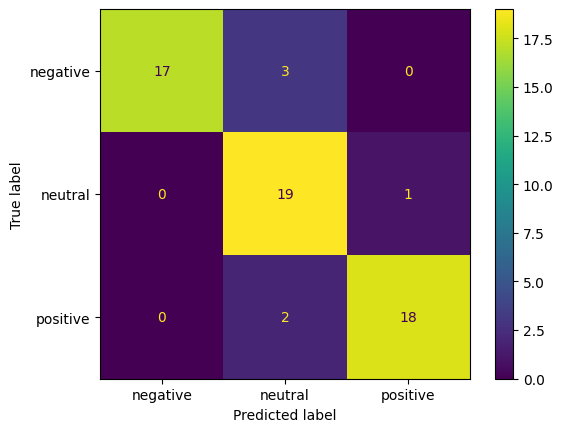

In [65]:
# test our SVM classifier on a list of new texts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_test_data = vectorizer.transform(random_sentences) 

SVMpredictions = svm_classifier.predict(X_test_data)

#generate a list of 20 positive, 20 negative and 20 neutral labels
test_labels = []

for _ in range(20):
    test_labels.extend(('positive', 'negative', 'neutral'))

for i in range(len(random_sentences)):
    print(f'verse: {random_sentences[i]}, SVM prediction: {SVMpredictions[i]}, ground truth label: {test_labels[i]}')

print("SVM accuracy:", accuracy_score(test_labels, SVMpredictions))


#plot the confusion matrix  

cm = confusion_matrix(test_labels, SVMpredictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)

disp.plot()

Lets see what verses were misclassified

In [ ]:
#print the misclassified verses
for i in range(len(random_sentences)):
    if SVMpredictions[i] != test_labels[i]:
        print(f'verse: {random_sentences[i]}, SVM prediction: {SVMpredictions[i]}, ground truth label: {test_labels[i]}')

#count the number of misclassified verses
misclassified_verses = sum(
    SVMpredictions[i] != test_labels[i]
    for i in range(len(random_sentences))
    )
print(f'Number of misclassified verses: {misclassified_verses}')

verse:  forwardness assure prudence zealously valor helping overwhelmed ability, SVM prediction: neutral, ground truth label: positive
verse:  adventure beautify safe smart, SVM prediction: neutral, ground truth label: positive
verse:  industrious curious humbleness awe acceptance, SVM prediction: neutral, ground truth label: positive
Number of misclassified verses: 3


When we generate sentences with out consideration for grammatical correctness and coherency. We can see that the model is able to classify the sentiment of the sentence correctly 96% of the time.

# Test 2
Now we will test our SVM on sentences that are grammatically correct and coherent.

In [ ]:
# install the following in order to train GPT2 for proper sentence generation:
% pip install git+https://github.com/huggingface/transformers
% pip install git+https://github.com/huggingface/accelerate

First we will train a GPT2 to generate sentences. Since we don't have alot of training time. We will fine tune it to our dataset.

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Convert sentences in dataframe to text file
with open('train.txt', 'w') as f:
    for text in bible_df['verse-text']:  # replace 'column_with_text' with the name of your text column
        f.write(text + '\n')

# Load the text dataset
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="train.txt",
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

# Set up the trainer
training_args = TrainingArguments(
    output_dir="./gpt2-bible",  # The output directory
    overwrite_output_dir=True,  # overwrite the content of the output directory
    num_train_epochs=3,  # number of training epochs
    per_device_train_batch_size=32,  # batch size for training
    save_steps=10_000,  # after # steps model is saved
    save_total_limit=2,  # delete old checkpoints; only this amount of checkpoints will be kept
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("./gpt2-bible")

# Generate text
input_ids = tokenizer.encode('In the beginning', return_tensors='pt')
output = model.generate(input_ids, max_length=100, temperature=0.7)
print(tokenizer.decode(output[:, input_ids.shape[-1]:][0], skip_special_tokens=True))

In [ ]:
% pip uninstall torch torchvision torchaudio
% pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
% pip install transformers

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pretrained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('C:\\Users\\Owner\\Downloads\\NLP\\Final Project\\gpt2-bible')

Now we are going to generate some fake bible verses.

In [ ]:
from transformers import pipeline

# Load the fine-tuned model
generator = pipeline('text-generation', model='./gpt2-bible', tokenizer=tokenizer, device='cpu')  # change to device=0 if GPU is available

# Select random verses from your Bible dataframe
random_verses = bible_df.sample(n=64)['verse-text'].tolist()

# Generate fake Bible verses
fake_verses = []
for verse in random_verses:
    # Use the verse as a prompt and generate a fake verse
    output = generator(verse, max_length=100, do_sample=True, temperature=0.9)
    fake_verse = output[0]['generated_text'][len(verse):]  # remove the original verse from the output
    fake_verses.append(fake_verse)

for i, verse in enumerate(fake_verses):
    print(f'Fake verse {i+1}: {verse}')


# Save the fake verses to a new dataframe
fake_df = pd.DataFrame(fake_verses, columns=['fake_verse'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Fake verse 1: 
But he hath given him a charge, if he walk according to the word of the LORD, and to my God.
Thus saith the Lord GOD; The LORD hath delivered us from the hand of the wicked.
For he hath set us up a throne on this side Jordan, and a throne on that side the river Euphrates.

Fake verse 2: 
And he took all his wife, and all his sons, and his daughters, and his camels, and all the men that he took, and sold them for a price of money, even unto the LORD; and all his possessions were gathered unto him.
And he
Fake verse 3: 
And the whole congregation of them that are in the tabernacle of the congregation shall be filled with uncleanness.
And after the portion thereof shall be for the children of Israel, and before the house for all Israel, saith the Lord GOD;
For every man is uncle
Fake verse 4:  Behold, I say unto thee, and ye shall hear it; and every thing that I have spoken unto you; and your mouth shall perceive the words which I have spoken.
Then the LORD spake to Moses, 

Now we will generate our ground truth labels for the generated text.

In [69]:
# preprocess the fake verses
fake_df['processed-text'] = fake_df['fake_verse'].apply(preprocess_text)
preprocess_test_data = [preprocess_text(text) for text in fake_df['processed-text']]

test_labels = [
    ensemble_sentiment(verse) for verse in fake_df['processed-text']
]

print(test_labels)

['positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'neutral', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative', 'positive']


verse: hath given charge walk according word lord god thus saith lord god lord hath delivered u hand wicked hath set u throne side jordan throne side river euphrates, SVM prediction: positive, ground truth label: positive
verse: took wife son daughter camel men took sold price money even unto lord possession gathered unto, SVM prediction: positive, ground truth label: positive
verse: whole congregation tabernacle congregation shall filled uncleanness portion thereof shall child israel house israel saith lord god every man uncle, SVM prediction: positive, ground truth label: positive
verse: behold say unto thee ye shall hear every thing spoken unto mouth shall perceive word spoken lord spake moses saying son man let eye see thing lord hath done unto let mind abide thing, SVM prediction: positive, ground truth label: negative
verse: let weary lay upon one sword bring upon another let ashamed cast, SVM prediction: negative, ground truth label: negative
verse: hath cast pit hath covered pe

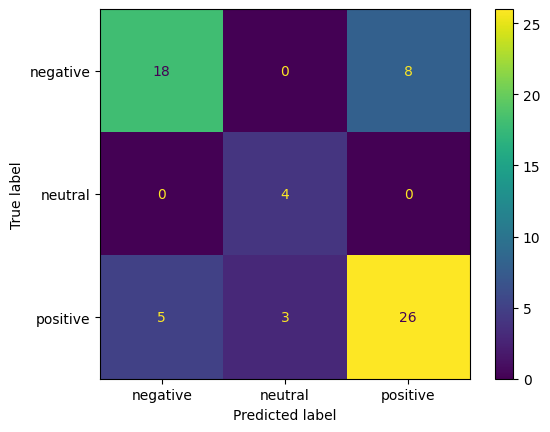

In [70]:
X_test_data = vectorizer.transform(preprocess_test_data) 

SVMpredictions = svm_classifier.predict(X_test_data)

for i in range(len(preprocess_test_data)-1):
    print(f'verse: {preprocess_test_data[i]}, SVM prediction: {SVMpredictions[i]}, ground truth label: {test_labels[i]}')

print("SVM accuracy:", accuracy_score(test_labels, SVMpredictions))

#plot the confusion matrix
confusion_matrix = confusion_matrix(test_labels, SVMpredictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=svm_classifier.classes_)

disp.plot()

In [71]:
#print the misclassified verses
for i in range(len(preprocess_test_data)):
    if SVMpredictions[i] != test_labels[i]:
        print(f'verse: {preprocess_test_data[i]}, SVM prediction: {SVMpredictions[i]}, ground truth label: {test_labels[i]}')

#count the number of misclassified verses
misclassified_verses = sum(
    SVMpredictions[i] != test_labels[i]
    for i in range(len(preprocess_test_data))
    )
print(f'Number of misclassified verses: {misclassified_verses}')

verse: behold say unto thee ye shall hear every thing spoken unto mouth shall perceive word spoken lord spake moses saying son man let eye see thing lord hath done unto let mind abide thing, SVM prediction: positive, ground truth label: negative
verse: david said unto tribe ammon found new man land canaan taken away seed young bullock cattle slain, SVM prediction: neutral, ground truth label: positive
verse: woe unto speak peaceably secret shall cast prison servant lord made abomination love set house seek heart hope came heaven thing, SVM prediction: positive, ground truth label: negative
verse: jacob sat door house lord son joab son amram kishab son kishab zipporah jacob set forth go country went according work, SVM prediction: neutral, ground truth label: positive
verse: way ye shall find desolate let called horeb lord hath given thine enemy dwell therein mountain commanded moses say unto top mountain behold make great mount mountain upon mount mountain upon hill, SVM prediction: po

Our model struggles to predict text that: 
- that are not long enough 
- are fragmented or incomplete

# Continued testing different types of models

While beyond the scope of this project, below we have set up an example of a BERT model that can be tested to see if transformers would yeild better results than above.

Other Deep learning methods are also provided for future research as well.

Deep learning-based methods:
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory (LSTM)
- Bidirectional Encoder Representations from Transformers (BERT)

# Transformers

- BERT
- GPT
- RoBERTa

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade git+https://github.com/huggingface/transformers.git

## BERT

BERT is a method of pre-training language representations, meaning that we train a general-purpose "language understanding" model on a large text corpus (like Wikipedia), and then use that model for downstream NLP tasks that we care about (like question answering). BERT outperforms previous methods because it is the first unsupervised, deeply bidirectional system for pre-training NLP.

In [ ]:
!pip install skorch

In [ ]:
import torch
from torch import nn
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier
import torch.optim as optim
from transformers import BertModel
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
one_hot = pd.get_dummies(bible_df['ensemble_sentiment_label'])

# Assuming 'verses' is your list of texts and 'labels' is your list of labels
train_texts = bible_df['processed-text'].tolist()
train_labels  = one_hot

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)

# Convert labels to tensor
train_labels = torch.tensor(train_labels.values)
                            
# Define your PyTorch model
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.linear = nn.Linear(768, 3)  # num_classes should match the number of your classes

    def forward(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.linear(outputs.pooler_output)
        return logits

net = NeuralNetClassifier(
    BertClassifier,
    criterion=nn.BCEWithLogitsLoss,  # Change the loss here
    train_split=None,  
    verbose=0
)

# Define the parameter grid
param_grid = {
    'lr': [1e-5, 3e-5, 1e-4],
    'max_epochs': [2, 3, 4],
    'optimizer': [optim.Adam, optim.SGD],
}

class BertDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx]
        }
        return item, self.labels[idx].float()  # Convert labels to float here

    def __len__(self):
        return len(self.labels)

# Create your dataset
train_dataset = BertDataset(train_encodings, train_labels)

# Define a GridSearchCV object that will do the hyperparameter search
gs = GridSearchCV(net, param_grid, scoring='accuracy', cv=5, verbose=2)

# Finally, fit the GridSearchCV object. This will try all combinations of hyperparameters and keep the best one.
gs.fit(X_train, y_train)  # Make sure your data is prepared and split appropriately

# After the Grid Search, you can inspect the best parameters and the score they achieved
print(gs.best_score_, gs.best_params_)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

from sklearn.model_selection import train_test_split

# Assuming 'verses' is your list of texts and 'labels' is your list of labels
verses = bible_df['processed-text'].tolist()
labels = bible_df['ensemble_sentiment_label'].tolist()

# change verses to strings
verses = [str(verse) for verse in verses]

labels = label_encoder.fit_transform(labels)

# Split the data into a training set and a test set
training_texts, testing_texts, training_labels, testing_labels = train_test_split(verses, labels, test_size=0.3)

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3) # num_labels is number of classes you have
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available

# Prepare data
class BibleDataset(Dataset):
    def __init__(self, verses, labels, tokenizer, max_length):
        self.verses = verses
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.verses)

    def __getitem__(self, idx):
        verse = str(self.verses[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            verse,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'verse_text': verse,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(verses, labels, tokenizer, max_length, batch_size):
    ds = BibleDataset(verses, labels, tokenizer, max_length)
    return DataLoader(ds, batch_size=batch_size, num_workers=0)

# You need to provide your training and testing data here
train_data_loader = create_data_loader(training_texts, training_labels, tokenizer, 256, 64)
test_data_loader = create_data_loader(testing_texts, testing_labels, tokenizer, 256, 64)

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer

for epoch in range(500):  # Number of epochs
    for batch in train_data_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to('cuda' if torch.cuda.is_available() else 'cpu')
        attention_mask = batch["attention_mask"].to('cuda' if torch.cuda.is_available() else 'cpu')
        labels = batch["label"].to('cuda' if torch.cuda.is_available() else 'cpu')

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Prediction
def get_predictions(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to('cuda' if torch.cuda.is_available() else 'cpu')
            attention_mask = batch["attention_mask"].to('cuda' if torch.cuda.is_available() else 'cpu')

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs[0], dim=1)

            predictions.extend(preds)
            prediction_probs.extend(outputs[0])

    predictions = torch.stack(predictions).cpu()
    return predictions


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
predictions = get_predictions(model, test_data_loader)
predictions = predictions.numpy()
predicted_labels = label_encoder.inverse_transform(predictions)

In [ ]:
test_data = ["Love your neighbor as yourself.","Hate your neighbor as yourself.","Give generously to those in need.","Hoard your resources and never share with others.","Speak the truth in love.","Spread lies and rumors to hurt others.","Work hard and do your best.","Be lazy and always cut corners.","Forgive others as you want to be forgiven.","Hold grudges and seek revenge.","Choose joy and contentment.","Embrace bitterness and discontentment.","Respect and honor your parents.","Disrespect and disobey your parents.","Be humble and put others first.","Be prideful and always put yourself first.","Be patient and slow to anger.","Be quick-tempered and easily provoked.","Be kind and compassionate to others.","Be mean and callous to others.","Be faithful to your spouse.","Cheat on your spouse and be unfaithful.","Treat others as you want to be treated.","Treat others poorly and disrespectfully.","Seek first the kingdom of God.","Pursue worldly pleasures and treasures.","Be a peacemaker and seek reconciliation.","Be a troublemaker and stir up conflict.","Use your resources to help others.","Use your resources only for yourself.","Be honest in your dealings with others.","Be deceitful and manipulative.","Be content with what you have.","Be envious and always want more.","Show hospitality to strangers.","Reject and exclude strangers.","Work hard to achieve your goals.","Be lazy and never strive for excellence.","Have integrity and be trustworthy.","Be dishonest and untrustworthy.","Treat everyone with respect and dignity.","Disrespect and mistreat others.","Be grateful for what you have.","Complain and always want more.","Speak kindly to others.","Speak harshly and hurtfully to others.","Be generous with your time and resources.","Be stingy and always keep everything for yourself.","Choose to see the good in others.","Choose to see the bad in others.","Believe in yourself and your abilities.","Doubt yourself and your abilities.","Always be learning and growing.","Never learn or grow.","Be a giver and a helper to those in need.","Be a taker and never give to others.","Be compassionate and empathetic towards others.","Be insensitive and unsympathetic towards others.","Live with purpose and intentionality.","Live aimlessly and without direction.","Seek to understand others.","Judge and condemn others."]



test_labels = [    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative",    "positive",    "negative"]
for data in test_data:
    preprocess_test_data = preprocess_text(data)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler

# Tokenize and encode the new data using the same tokenizer and max_length as your training data
encoded_data = tokenizer.batch_encode_plus(
    preprocess_test_data,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    truncation=True,  # add truncation here
    return_tensors='pt'
)

# Create a DataLoader
test_dataset = TensorDataset(encoded_data['input_ids'], encoded_data['attention_mask'])
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=4)

# Get the predictions
predictions = get_predictions(model, test_dataloader)
predictions = predictions.numpy()
predicted_labels = label_encoder.inverse_transform(predictions)

In [ ]:
# compare the predicted labels to the ground truth labels

print(predicted_labels)
print(test_labels)


predicted_labels_encoded = label_encoder.transform(predicted_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print(predicted_labels_encoded)
print(test_labels_encoded)

# calculate the accuracy
accuracy = np.mean(predicted_labels_encoded == test_labels_encoded)
print("Accuracy:", accuracy)

# calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(test_labels_encoded, predicted_labels)

print("Confusion matrix:", confusion_matrix)

print("Predicted labels:", predicted_labels)
print("Ground truth labels:", test_labels)

# calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(test_labels, predicted_labels)

print("Confusion matrix:", confusion_matrix)

['neutral' 'positive' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'positive' 'positive' 'neutral' 'positive' 'neutral' 'positive' 'neutral'
 'positive' 'positive' 'neutral' 'positive' 'positive' 'neutral']
['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative']
[1 2 1 1 2 1 1 2 

C:\Users\Owner\AppData\Local\Temp\ipykernel_3600\2726450924.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(predicted_labels_encoded == test_labels_encoded)


ValueError: Found input variables with inconsistent numbers of samples: [64, 20]

The test yeilds strange results. Only returning 20 results for the 64 provided inputs. Also refusing to awknowledge any result as "negative", showing that our label encoding may need some fine tuning, or we need to tune the model to better recognize the labels we have provided.